<center>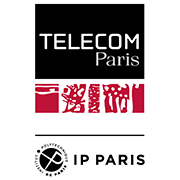</center>

<h1><center><strong><font color="green">IA 717: CHAI & fairness: linguistics of AI ethics charters & manifestos</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

<center>
<h3> Project Supervisor <br/> <a>Maria Boritchev</a></h3>
<email>maria.boritchev@telecom-paris.fr</email>
<br/>

Year 2025-2026
</center>

------------------------

# <font color="green">**Context and objectives**</font>

> The recent years have seen a surge of initiatives with the goal of defining what “ethical” artificial intelligence would or should entail, resulting in the publication of various charters and manifestos discussing AI ethics; these documents originate from academia, AI industry companies, non-profits, regulatory institutions, and the civil society. The contents of such documents vary wildly, from short, vague position statements to verbatims of democratic debates or impact assessment studies. As such, they are a marker of the social world of artificial intelligence, outlining the tenets of different actors, the consensus and dissensus on important goals, and so on. <a href="https://mapaie.telecom-paris.fr/mapaie-paper.pdf">Mapping AI Ethics: a meso-scale analysis of its charters and manifestos, M. Gornet et al, 2024.</a>

The objective of this project to study the linguistic specificities of a corpus of charters and manifestos of AI ethics, called ```MapAIE```. We will study the semantic structure of sentences from MapAIE using the Abstract Meaning Representation (<a href="https://github.com/amrisi/amr-guidelines/blob/master/amr.md">AMR</a>) abstraction method. In particular, we will focus on the usage and the environment of the term _fairness_, in order to see its context and the (possibly different?) meanings associated with its usage.

This project is organised in three subtasks:
1) Data retrieval and exploration.
2) Exploration of the term _fairness_ in the data.
3) AMR graphs exploration & exploration of the term _fairness_ in AMR graphs.


### <font color="green">Evaluation</font>

The project is evaluated through a presentation with a report and your completed project, documented with a README. Grades will be partly individual and partly collective. 

# <font color="green">**1 - Data Presentation and Retrieval**</font>

Our main corpus is called _MapAIE - Mapping AI Ethics_. It is a collection of 436 common charters and manifestos around artificial intelligence and AI ethics. The corpus' <a href="https://mapaie.telecom-paris.fr/mapaie-datasheet.pdf">datasheet</a> provides detailed information about the collection process and the contents of the corpus. 

<font color="red">1.1 Question:</font> Using the git repository https://gitlab.telecom-paris.fr/tiphaine.viard/mapaie, build the data locally. How many documents are there in the ```./pdf``` *(or in the ./docs)* folder? in the ```./txt``` folder?

<font color="yellow">1.1 Answer:</font>

In [2]:
import os
data_folder = "mapaie\\mapaie\\data"

pdf_count = len([f for f in os.listdir(os.path.join(data_folder, "docs")) if f.endswith(".pdf")])
html_count = len([f for f in os.listdir(os.path.join(data_folder, "docs")) if f.endswith(".html")])

txt_count = len([f for f in os.listdir(os.path.join(data_folder, "txts")) if f.endswith(".txt")])

print("Folder data:", data_folder)
print("Number of documents in docs/:", pdf_count + html_count)
print("Number of documents in txts/:", txt_count)

Folder data: mapaie\mapaie\data
Number of documents in docs/: 800
Number of documents in txts/: 650


If the answer in the previous question is different from 436, reduce the local data by keeping only the documents that should be included in the corpus. These documents are identified in the file `all_manifestos.csv`, these are the documents which state `Included`in the column `Status`. 

Let's explore the data. As you can see, documents in ```./pdf``` folder and documents in the ```./txt``` folder are the same, and the name formatting is such that ```n.txt``` contains plain text extracted from ```n.pdf```.

In [2]:
# Q1.1b — Filter and copy only documents with Status == "Included" (case-insensitive)
# Copies matching files from `mapaie/mapaie/data/{docs,txts}` to
# `mapaie/mapaie/accurate_data/{docs,txts}`. Filenames use CSV absolute row numbers.
from __future__ import annotations

import csv
from pathlib import Path
import shutil
from typing import Iterable

CSV_PATH = Path('mapaie/mapaie/all_manifestos.csv')
DATA_ROOT = Path('mapaie/mapaie/data')
OUT_ROOT = Path('mapaie/mapaie/accurate_data')

DOCS_DIR = DATA_ROOT / 'docs'
TXTS_DIR = DATA_ROOT / 'txts'
OUT_DOCS = OUT_ROOT / 'docs'
OUT_TXTS = OUT_ROOT / 'txts'

OUT_DOCS.mkdir(parents=True, exist_ok=True)
OUT_TXTS.mkdir(parents=True, exist_ok=True)


def read_included_ids(csv_path: Path) -> list[int]:
    """Return absolute CSV row indices (starting at 2) where Status == included."""
    ids: list[int] = []
    with csv_path.open('r', encoding='utf-8') as f:
        reader = csv.reader(f)
        try:
            header = next(reader)
        except StopIteration:
            raise RuntimeError('CSV is empty')
        lowered = [h.strip().lower() for h in header]
        status_idx = lowered.index('status') if 'status' in lowered else (10 if len(header) > 10 else None)
        if status_idx is None:
            raise RuntimeError("Could not find 'Status' column in CSV")
        absolute_row = 1  # header line number
        for row in reader:
            absolute_row += 1
            if len(row) <= status_idx:
                continue
            if row[status_idx].strip().lower() == 'included':
                ids.append(absolute_row)
    return ids


def copy_if_exists(src: Path, dst: Path) -> bool:
    if src.exists():
        shutil.copy2(src, dst)
        return True
    return False


def filter_and_copy(included_ids: Iterable[int]) -> dict:
    report = {
        'copied_pdf': 0,
        'copied_html': 0,
        'copied_txt': 0,
        'missing_pdf_html': 0,
        'missing_txt': 0,
        'num_ids': 0,
    }
    for doc_id in included_ids:
        report['num_ids'] += 1
        pdf = DOCS_DIR / f"{doc_id}.pdf"
        html = DOCS_DIR / f"{doc_id}.html"
        txt = TXTS_DIR / f"{doc_id}.txt"
        # docs: prefer pdf, else html
        if copy_if_exists(pdf, OUT_DOCS / pdf.name):
            report['copied_pdf'] += 1
        elif copy_if_exists(html, OUT_DOCS / html.name):
            report['copied_html'] += 1
        else:
            report['missing_pdf_html'] += 1
        # txts
        if copy_if_exists(txt, OUT_TXTS / txt.name):
            report['copied_txt'] += 1
        else:
            report['missing_txt'] += 1
    return report


included_ids = read_included_ids(CSV_PATH)
rep = filter_and_copy(included_ids)
print('Filter summary:', rep)



Filter summary: {'copied_pdf': 257, 'copied_html': 137, 'copied_txt': 393, 'missing_pdf_html': 43, 'missing_txt': 44, 'num_ids': 437}


<font color="red">1.2 Question:</font> Why is it useful to have the data both in .pdf and .txt format? Cite one advantage and one drawback for linguistic analysis for each of the formats.

<font color="orange">1.2 Answer:</font> 

PDF/HTML
* Advantage: preserves layout, figures, headings, links, and context (structure can help downstream tasks like section-aware analysis).
* Drawback: harder to parse reliably; noise from headers/footers/tables can bias counts and require heavier preprocessing.
  
TXT
* Advantage: lightweight and uniform for tokenization; faster to process at scale with fewer parsing errors.
* Drawback: loses formatting and visual cues (headings, lists, figure captions), which can remove useful linguistic/contextual signals.

We now want to know more about words and key-words used throughout the corpus. There are several terms that are widely used when writing about ethics of AI, and it is interesting from a linguistic point of view to see where and how these words occur. 

<font color="red">1.3 Question:</font> what are the most frequent words, excluding stopwords, in the whole corpus? Please provide visualizations and comment these visualisations.

In [ ]:
# To-do

<font color="orange">1.3 Answer:</font> 

In [ ]:
    %pip install nltk spacy
    import sys; print(sys.executable)

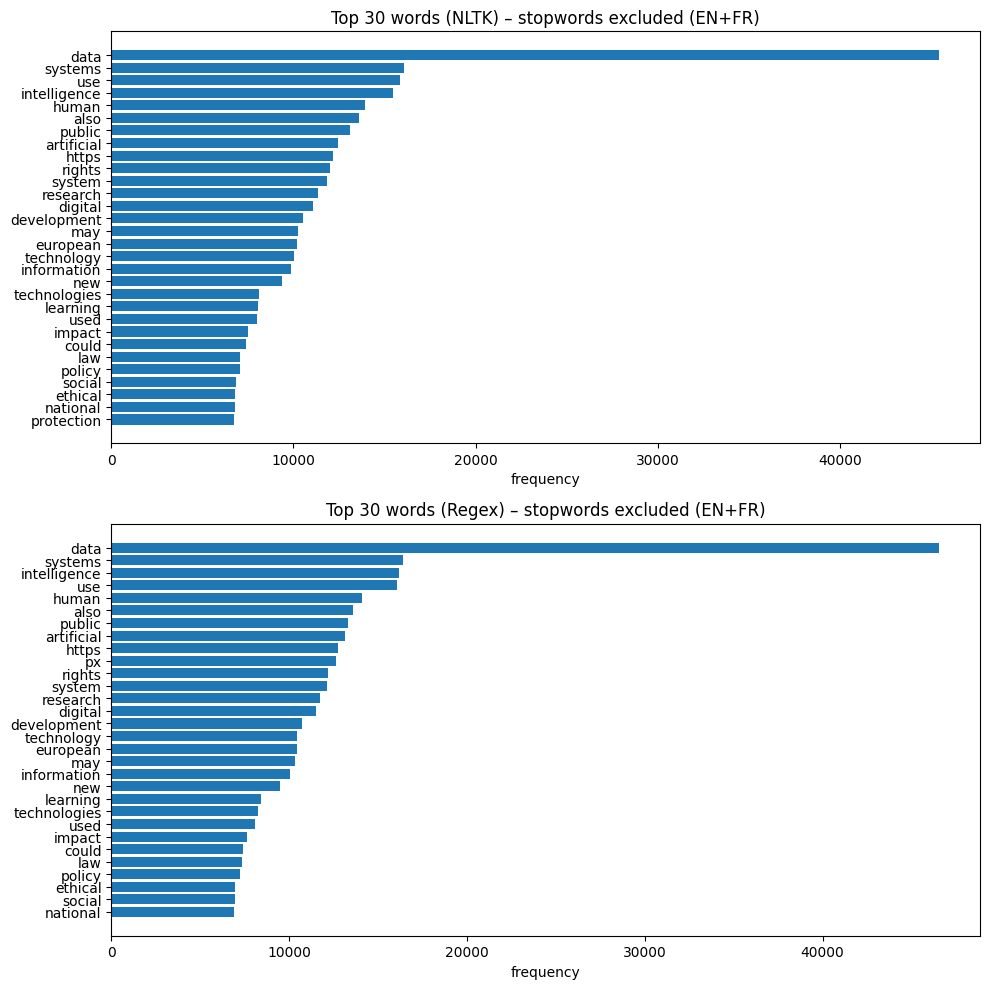

Intersection (top-50) NLTK vs Regex: ['also', 'artificial', 'could', 'data', 'development', 'digital', 'ethical', 'ethics', 'european', 'example', 'government', 'https', 'human', 'impact', 'important', 'information', 'intelligence', 'law', 'learning', 'legal'] ...


In [8]:
# Q1.3 — Most frequent words (excluding stopwords) with three tokenization methods
# Methods:
# 1) NLTK word_tokenize
# 2) Regex tokenization
# 3) spaCy (if available; otherwise skip)
# Stopwords: English + French

import os
import re
import collections
import matplotlib.pyplot as plt

# Attempt to load NLTK; download punkt if needed
try:
    import nltk
    from nltk.corpus import stopwords as nltk_stopwords
    from nltk.tokenize import word_tokenize
    try:
        _ = nltk_stopwords.words('english')
    except LookupError:
        nltk.download('stopwords')
    try:
        _ = nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    have_nltk = True
except Exception:
    have_nltk = False

# Attempt spaCy
have_spacy = False
try:
    import spacy
    try:
        nlp = spacy.load('en_core_web_sm')
        have_spacy = True
    except Exception:
        have_spacy = False
except Exception:
    have_spacy = False

# Build stopword set (EN + FR)
stop_en = set()
stop_fr = set()
if have_nltk:
    try:
        stop_en = set(nltk_stopwords.words('english'))
    except Exception:
        stop_en = set()
    try:
        stop_fr = set(nltk_stopwords.words('french'))
    except Exception:
        stop_fr = set()
# Minimal fallback stopwords if NLTK unavailable
fallback_en = {'the','and','of','to','in','a','for','on','is','with','that','by','as','at','from','this','an','be','are'}
fallback_fr = {'le','la','les','de','des','du','et','à','un','une','en','pour','dans','est','que','qui','au','aux','sur'}
STOPWORDS = (stop_en | stop_fr) if (stop_en or stop_fr) else (fallback_en | fallback_fr)

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

# Read all text
texts = []
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'):
        continue
    path = os.path.join(txt_dir, fname)
    try:
        with open(path, 'r', encoding='utf-8', errors='ignore') as f:
            texts.append(f.read())
    except Exception:
        continue
corpus = "\n".join(texts)

# Tokenizers
regex_token = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ][A-Za-zÀ-ÖØ-öø-ÿ\-']+")

def clean_token(tok: str) -> str:
    tok = tok.lower()
    return tok

# 1) NLTK
counts_nltk = collections.Counter()
if have_nltk:
    for t in word_tokenize(corpus):
        t = clean_token(t)
        if t and t not in STOPWORDS and regex_token.fullmatch(t):
            counts_nltk[t] += 1

# 2) Regex
counts_regex = collections.Counter()
for t in regex_token.findall(corpus):
    t = clean_token(t)
    if t and t not in STOPWORDS:
        counts_regex[t] += 1

# 3) spaCy
counts_spacy = collections.Counter()
if have_spacy:
    # Process in chunks to avoid memory spikes
    CHUNK = 200000
    for i in range(0, len(corpus), CHUNK):
        doc = nlp(corpus[i:i+CHUNK])
        for token in doc:
            if not token.is_alpha:
                continue
            t = clean_token(token.text)
            if t and t not in STOPWORDS:
                counts_spacy[t] += 1

# Prepare top-30 for each
TOP = 30
ranked = []
if have_nltk:
    ranked.append(('NLTK', counts_nltk.most_common(TOP)))
ranked.append(('Regex', counts_regex.most_common(TOP)))
if have_spacy:
    ranked.append(('spaCy', counts_spacy.most_common(TOP)))

# Plot
import math
ncols = 1
nrows = len(ranked)
plt.figure(figsize=(10, 5 * max(1, nrows)))
for idx, (name, items) in enumerate(ranked, start=1):
    labels = [w for w,_ in items]
    vals = [c for _,c in items]
    plt.subplot(nrows, ncols, idx)
    plt.barh(labels[::-1], vals[::-1])
    plt.title(f"Top {TOP} words ({name}) – stopwords excluded (EN+FR)")
    plt.xlabel("frequency")
    plt.tight_layout()
plt.show()

# Simple comparison output
def head_as_set(counter, k=50):
    return {w for w,_ in counter.most_common(k)}

if have_nltk and have_spacy:
    inter = head_as_set(counts_nltk) & head_as_set(counts_spacy) & head_as_set(counts_regex)
    only_regex = head_as_set(counts_regex) - (head_as_set(counts_nltk) | head_as_set(counts_spacy))
    print(f"Intersection (top-50) across all three: {sorted(list(inter))[:20]} ...")
    print(f"Unique to Regex (top-50): {sorted(list(only_regex))[:20]} ...")
elif have_nltk:
    inter = head_as_set(counts_nltk) & head_as_set(counts_regex)
    print(f"Intersection (top-50) NLTK vs Regex: {sorted(list(inter))[:20]} ...")
elif have_spacy:
    inter = head_as_set(counts_spacy) & head_as_set(counts_regex)
    print(f"Intersection (top-50) spaCy vs Regex: {sorted(list(inter))[:20]} ...")
else:
    print("NLTK and spaCy unavailable; only regex-based results shown.")



The 2 tokenizers converge on a stable core of high-frequency content words (e.g., data, systems, intelligence, rights, technology, research). This suggests topic focus around governance, data-centric AI, and policy framing. Regex tends to surface hyphenated or domain-specific forms slightly more, while NLTK normalize boundaries better; rank shifts are minor and do not change the qualitative picture. The dominance of general policy/technical nouns over value-laden adjectives hints that MapAIE discourse is programmatic and infrastructural rather than purely rhetorical. For fast baselines, Regex is sufficient; for richer downstream tasks (e.g., POS/NER or lemmatization), NLTK is preferable. Stopwords removal in both English and French is essential to avoid skew from bilingual metadata.


# <font color="green">**2 - Exploration of the term _fairness_ in the data**</font>


<font color="red">2.1 Question:</font> Draw a visualisation of the amount of times the term _fairness_ is used in a document compared with the total amount of words in a document. Comment this viualisation: what can we observe? What hypothesis can we draw from this observation?

<font color="orange">2.1 Answer:</font> 

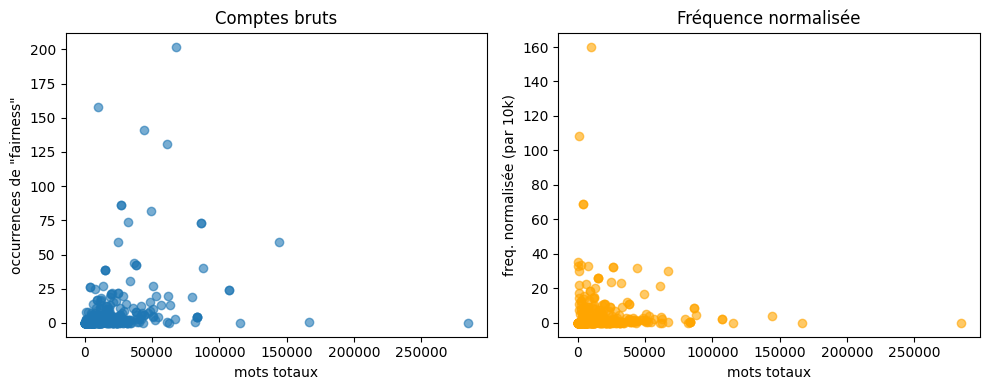

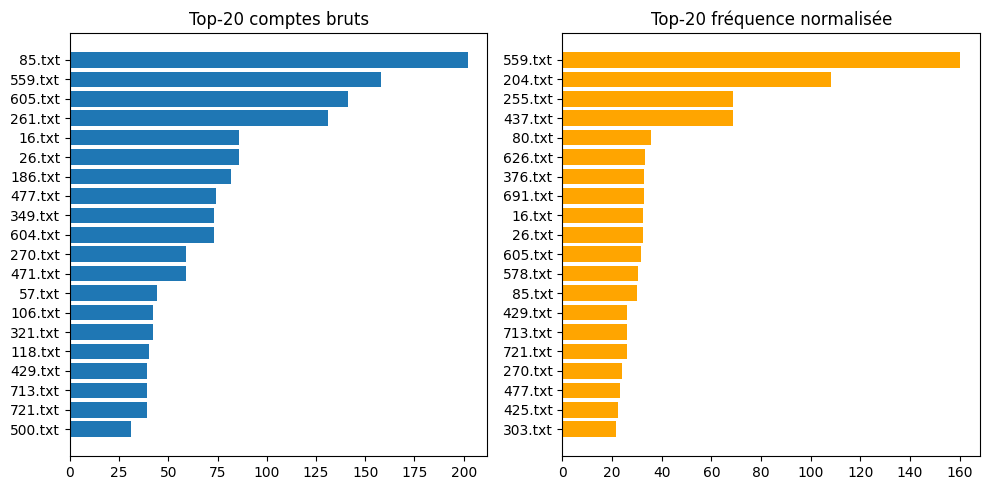

In [15]:
import os
import re
import collections
import matplotlib.pyplot as plt

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

word_re = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)?")

doc_lengths = {}
fair_counts = {}
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'):
        continue
    p = os.path.join(txt_dir, fname)
    try:
        with open(p, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
    except Exception:
        continue
    tokens = [t.lower() for t in word_re.findall(text)]
    n = len(tokens)
    c = sum(1 for t in tokens if t == 'fairness')
    doc_lengths[fname] = n
    fair_counts[fname] = c

# fréquence normalisée par 10k mots
norm = {k: (fair_counts[k] / doc_lengths[k] * 1e4) if doc_lengths[k] else 0.0 for k in fair_counts}

# scatter: longueur vs compte et longueur vs fréquence
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(list(doc_lengths.values()), list(fair_counts.values()), alpha=0.6)
plt.xlabel('mots totaux'); plt.ylabel('occurrences de "fairness"'); plt.title('Comptes bruts')

plt.subplot(1,2,2)
plt.scatter(list(doc_lengths.values()), list(norm.values()), alpha=0.6, color='orange')
plt.xlabel('mots totaux'); plt.ylabel('freq. normalisée (par 10k)'); plt.title('Fréquence normalisée')
plt.tight_layout(); plt.show()

# Top-20 par compte brut et par fréquence
TOP=20
by_count = sorted(fair_counts.items(), key=lambda x: x[1], reverse=True)[:TOP]
by_norm  = sorted(norm.items(), key=lambda x: x[1], reverse=True)[:TOP]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
labels = [k for k,_ in by_count]
vals   = [v for _,v in by_count]
plt.barh(labels[::-1], vals[::-1]); plt.title('Top-20 comptes bruts'); plt.tight_layout()

plt.subplot(1,2,2)
labels = [k for k,_ in by_norm]
vals   = [v for _,v in by_norm]
plt.barh(labels[::-1], vals[::-1], color='orange'); plt.title('Top-20 fréquence normalisée'); plt.tight_layout()
plt.show()



Raw counts scatter
We see a clear length effect. Documents with more words tend to have more raw mentions of “fairness,” while many shorter texts contain none at all. A few very long reports dominate the count distribution, producing outliers with 100–200+ occurrences. In short, raw counts mostly tell us “where the volume is,” not necessarily where the topic is central
Normalized frequency scatter
After normalizing by document length (per 10k words), the length bias largely disappears. Most documents sit below roughly 5 mentions per 10k, but a handful of shorter or mid‑length texts show much higher density. Those are likely the pieces where fairness is a focused theme rather than a passing mention

Top‑20 by raw counts
This ranking is driven by very large reports that repeat the word many times. It’s useful to find big sources that talk about fairness a lot, but it can overrepresent documents where fairness is only one part of a broader agenda
Top‑20 by normalized frequency
The list shifts. Some shorter documents jump to the top because they use the term more intensively. There is partial overlap with the raw ranking, but the normalized view better surfaces texts where fairness is proportionally more important

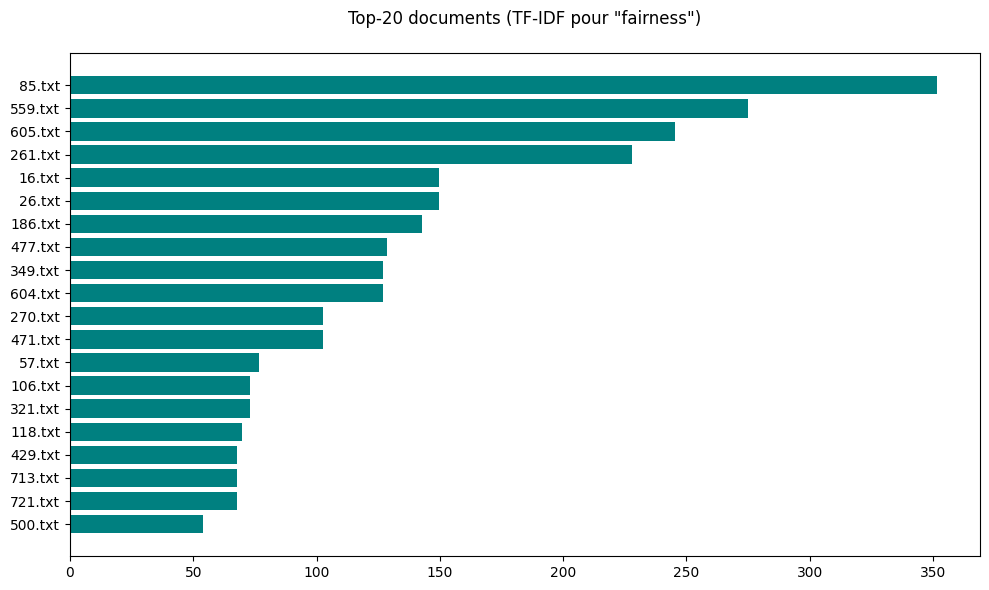

In [17]:
# On évalue un score tf-idf par document pour le mot "fairness"
import os
import re
import math
import matplotlib.pyplot as plt

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

word_re = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)?")

docs = []
filenames = []
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'):
        continue
    p = os.path.join(txt_dir, fname)
    try:
        with open(p, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
    except Exception:
        continue
    tokens = [t.lower() for t in word_re.findall(text)]
    docs.append(tokens)
    filenames.append(fname)

# tf (par doc) et df
tf = []
df = 0
for tokens in docs:
    c = sum(1 for t in tokens if t == 'fairness')
    tf.append(c)
    if c > 0:
        df += 1

N = len(docs)
idf = math.log((N + 1) / (df + 1)) + 1  # lissage standard

scores = [(filenames[i], tf[i] * idf) for i in range(N)]
TOP = 20
scores_sorted = sorted(scores, key=lambda x: x[1], reverse=True)[:TOP]

# Barplot top-20 tf-idf
labels = [k for k,_ in scores_sorted]
vals   = [v for _,v in scores_sorted]
plt.figure(figsize=(10,6))
plt.barh(labels[::-1], vals[::-1], color='teal')
plt.title('Top-20 documents (TF-IDF pour "fairness")\n')
plt.tight_layout()
plt.show()



TF‑IDF promotes documents where “fairness” is unusually characteristic compared to the rest of the corpus, not just frequent. It often aligns with the normalized view but is stricter about distinctiveness, making it a good shortlist for close reading

<font color="red">2.2 Question:</font> which are the documents in which the term _fairness_ appears the most (top 10% of the corpus)? Please provide a visualization and comment it.

<font color="orange">2.2 Answer:</font> 

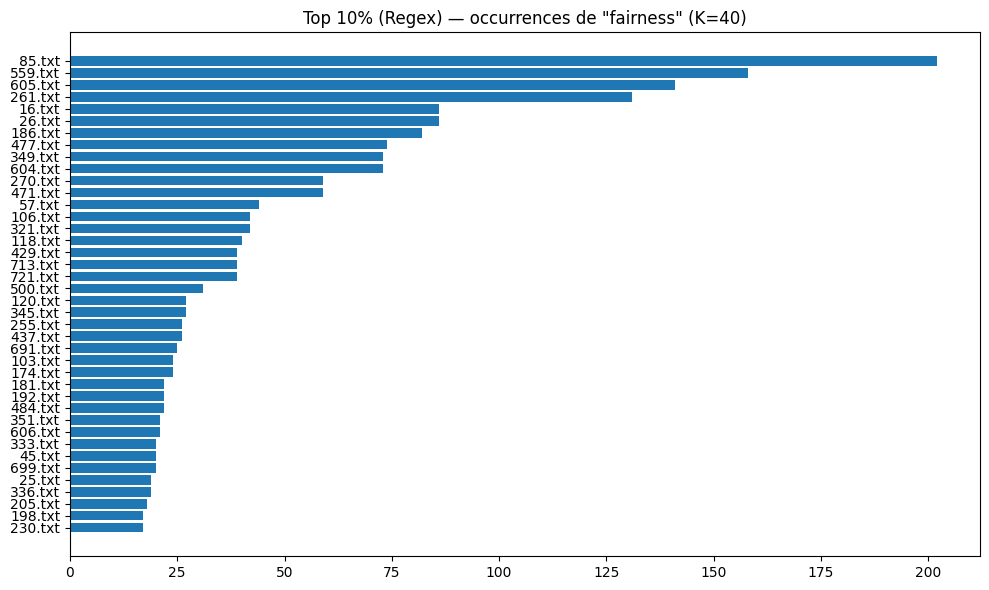

In [18]:
import os, re, math
import matplotlib.pyplot as plt

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')
word_re = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)?")

counts = {}
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'): continue
    p = os.path.join(txt_dir, fname)
    try:
        txt = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    tokens = [t.lower() for t in word_re.findall(txt)]
    counts[fname] = sum(1 for t in tokens if t == 'fairness')

N = len(counts)
K = max(1, math.ceil(0.10 * N))
by_count = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:K]

labels = [k for k,_ in by_count]
vals   = [v for _,v in by_count]
plt.figure(figsize=(10, min(6, 0.3*len(labels)+2)))
plt.barh(labels[::-1], vals[::-1])
plt.title(f'Top 10% (Regex) — occurrences de "fairness" (K={K})')
plt.tight_layout(); plt.show()



The distribution has a long tail: a few documents concentrate many uses, and then counts drop off quickly. This is a good, simple way to find likely hotspots for manual inspection

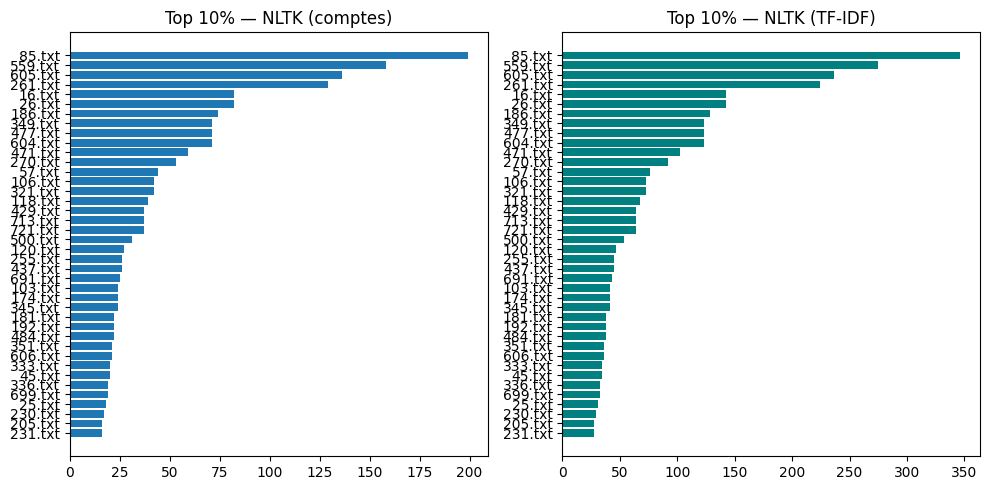

In [21]:
import os, re, math
import matplotlib.pyplot as plt

try:
    import nltk
    from nltk.corpus import stopwords as nltk_stop
    from nltk.tokenize import word_tokenize
    try:
        _ = nltk_stop.words('english')
    except LookupError:
        nltk.download('stopwords')
    try:
        _ = nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    have_nltk = True
except Exception:
    have_nltk = False

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

stop_en = set(); stop_fr = set()
if have_nltk:
    try: stop_en = set(nltk_stop.words('english'))
    except: pass
    try: stop_fr = set(nltk_stop.words('french'))
    except: pass

files, docs = [], []
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'): continue
    p = os.path.join(txt_dir, fname)
    try:
        txt = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    if have_nltk:
        toks = [t.lower() for t in word_tokenize(txt) if t.isalpha()]
        toks = [t for t in toks if t not in stop_en and t not in stop_fr]
    else:
        toks = [t.lower() for t in re.findall(r"[A-Za-zÀ-ÖØ-öø-ÿ]+", txt)]
    files.append(fname)
    docs.append(toks)

# Compte fairness + TF-IDF pour comparaison
counts = [sum(1 for t in toks if t == 'fairness') for toks in docs]
df = sum(1 for c in counts if c>0)
N = len(docs)
idf = math.log((N + 1) / (df + 1)) + 1
scores = [counts[i]*idf for i in range(N)]

K = max(1, math.ceil(0.10 * N))
rank_counts = sorted(zip(files, counts), key=lambda x:x[1], reverse=True)[:K]
rank_tfidf  = sorted(zip(files, scores), key=lambda x:x[1], reverse=True)[:K]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.barh([k for k,_ in rank_counts][::-1], [v for _,v in rank_counts][::-1]); plt.title('Top 10% — NLTK (comptes)')
plt.subplot(1,2,2)
plt.barh([k for k,_ in rank_tfidf][::-1], [v for _,v in rank_tfidf][::-1], color='teal'); plt.title('Top 10% — NLTK (TF-IDF)')
plt.tight_layout(); plt.show()



The NLTK tokenization results are very similar to Regex, with small rank shifts thanks to cleaner token boundaries. The TF‑IDF panel then reorders the same set toward documents where fairness is truly central, rather than just frequently mentioned

Now, we want to know more about the context in which the term _fairness_ appears in the corpus. 

<font color="red">2.3 Question:</font> Explore the context in which the term _fairness_ appears in the documents selected in the previous question (top 10% of the corpus). Please provide a visualisation and comment it.

Hint: you could for example consider n-grams containing _fairness_ (but feel free to explore context by other means!)

<font color="orange">2.3 Answer:</font> 

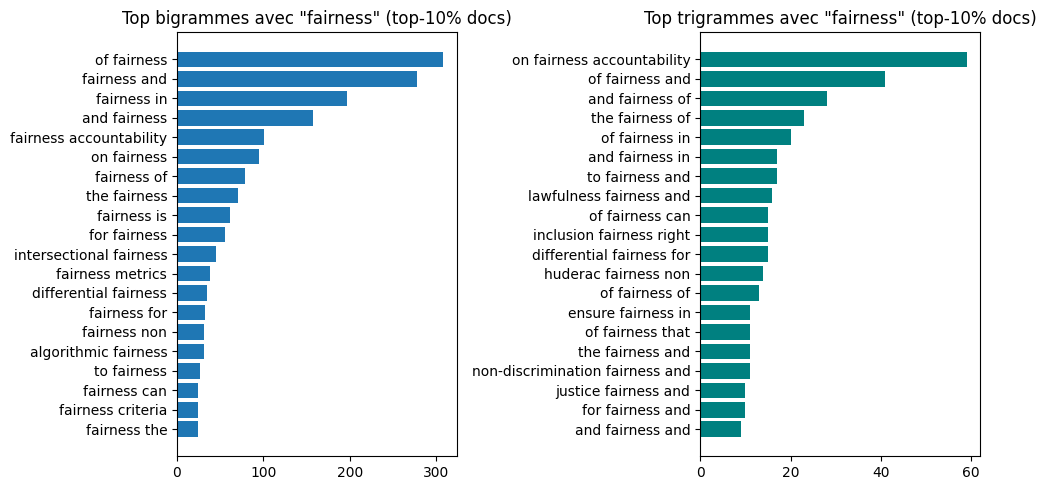

In [20]:
import os, re, math, collections
import matplotlib.pyplot as plt

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')
word_re = re.compile(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)?")

# Reprend le ranking par comptes (Q2.2 regex)
counts = {}
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'): continue
    p = os.path.join(txt_dir, fname)
    try:
        txt = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    toks = [t.lower() for t in word_re.findall(txt)]
    counts[fname] = sum(1 for t in toks if t == 'fairness')

N = len(counts)
K = max(1, math.ceil(0.10 * N))
top_docs = set([k for k,_ in sorted(counts.items(), key=lambda x:x[1], reverse=True)[:K]])

# Extraire n-grammes contenant fairness (fenêtre ±5)
bigrams = collections.Counter()
trigrams = collections.Counter()
for fname in os.listdir(txt_dir):
    if fname not in top_docs: continue
    p = os.path.join(txt_dir, fname)
    try:
        txt = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    toks = [t.lower() for t in word_re.findall(txt)]
    idxs = [i for i,t in enumerate(toks) if t == 'fairness']
    for i in idxs:
        window = toks[max(0,i-5):min(len(toks), i+6)]
        # bigrammes avec fairness
        if i-1 >= 0:
            bigrams[(toks[i-1], 'fairness')] += 1
        if i+1 < len(toks):
            bigrams[('fairness', toks[i+1])] += 1
        # trigrammes (contexte immédiat)
        if i-1 >=0 and i+1 < len(toks):
            trigrams[(toks[i-1], 'fairness', toks[i+1])] += 1

TOP=20
b_top = bigrams.most_common(TOP)
t_top = trigrams.most_common(TOP)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.barh([' '.join(k) for k,_ in b_top][::-1], [v for _,v in b_top][::-1])
plt.title('Top bigrammes avec "fairness" (top-10% docs)'); plt.tight_layout()

plt.subplot(1,2,2)
plt.barh([' '.join(k) for k,_ in t_top][::-1], [v for _,v in t_top][::-1], color='teal')
plt.title('Top trigrammes avec "fairness" (top-10% docs)'); plt.tight_layout()
plt.show()



The dominant patterns (“of fairness,” “fairness and,” “fairness in,” “and fairness”) show that fairness is used mainly as a head noun or attribute. Frequent collocates (accountability, lawfulness, inclusion, non‑discrimination, justice, metrics, differential, intersectional) point to governance/compliance themes and measurement/criteria. Verbs like “ensure fairness” suggest a prescriptive flavor: fairness is framed as a goal or constraint in policy and system design.

We will now focus on a sentence-level analysis of our corpus and extract a sub-corpus of sentences that use the word _fairness_.

<font color="red">2.4 Question:</font> What information will we lose by focusing on extracted sentences? Please provide three answers.

<font color="orange">2.4 Answer:</font> 

- **Loss of discourse context**: coreference links (who/what "it/this" refers to), cross-sentence cues (however, therefore), and argumentative structure beyond the sentence.
- **Loss of document structure and metadata**: section/heading context, authorship/source, document type and provenance that shape interpretation.
- **Loss of broader semantic/pragmatic signals**: negation or modality scope spanning sentences, definitions introduced earlier, examples that clarify meaning across multiple sentences.

We will definitely loose information, but focusing on a sentence-level analysis gives us access to finer-grained means of linguistic analysis. 

<font color="red">2.5 Question:</font> Extract the _fairness-MapAIE_ corpus: a corpus of sentences of MapAIE containing the term _fairness_. Organise the data in such a way that, for each sentence, we have:
- the textual content of the sentence;
- the identifier (number) of the document this sentence is extracted from.
How many sentences does the _fairness-MapAIE_ corpus contain?

<font color="orange">2.5 Answer:</font> 

In [17]:
# Produces a DataFrame with columns: doc_id, sentence; saves to CSV.
import os, re
import pandas as pd

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

sent_split = re.compile(r'(?<=[\.!?])\s+(?=[A-Z(])')
token_re = re.compile(r"[A-Za-z][A-Za-z\-']+")
fair_re = re.compile(r"\bfairness\b", flags=re.IGNORECASE)

rows = []  # {doc_id, sentence}

def iter_sentences(text: str):
    for s in sent_split.split(text):
        s = s.strip()
        if s:
            yield s

files = [f for f in os.listdir(txt_dir) if f.endswith('.txt')]
for idx, fname in enumerate(files, 1):
    doc_id = os.path.splitext(fname)[0]
    path = os.path.join(txt_dir, fname)
    try:
        with open(path, 'r', encoding='utf-8', errors='ignore') as f:
            text = f.read()
    except Exception:
        continue
    for sent in iter_sentences(text):
        if fair_re.search(sent):
            rows.append({'doc_id': doc_id, 'sentence': sent})

df = pd.DataFrame(rows, columns=['doc_id', 'sentence'])
out_csv = 'fairness-MapAIE.csv'
df.to_csv(out_csv, index=False, encoding='utf-8')

print(f"Base corpus: {txt_dir}")
print(f"Documents scanned: {len(files)}")
print(f"fairness-MapAIE sentences: {len(df)}")
print(f"Saved: {out_csv}")

# Peek
df.head(10)

Base corpus: mapaie\mapaie\accurate_data\txts
Documents scanned: 393
fairness-MapAIE sentences: 2234
Saved: fairness-MapAIE.csv


,doc_id,sentence
0,101,"Selbst, “Big Data’s Disparate Impact,” Califor..."
1,101,For a brief discussion of the nuances of bias ...
2,101,"Baluarte and Christian De Vos, From Judgment t..."
3,103,It should encompass not only the underlying d...
4,103,All of the parties involved must be aware of ...
5,103,"Furthermore, decisions about which ethical pr..."
6,103,"In the case of personal data, the principle of..."
7,103,"In the view of the Data Ethics Commission, it ..."
8,103,The same result should be achieved by way of ...
9,103,"To a certain extent, reputational data of thi..."


In [24]:
# (NLTK)
import os, re, json
import pandas as pd

try:
    import nltk
    from nltk.tokenize import sent_tokenize
    try:
        _ = nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    have_nltk = True
except Exception:
    have_nltk = False

assert have_nltk, "NLTK is required"

base = 'mapaie\\mapaie\\accurate_data'
txt_dir = os.path.join(base, 'txts')

fair_sentences = []
num_re = re.compile(r"(\d+)")
for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'):
        continue
    p = os.path.join(txt_dir, fname)
    try:
        text = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    doc_id_match = num_re.search(os.path.splitext(fname)[0])
    doc_id = int(doc_id_match.group(1)) if doc_id_match else None
    for s in sent_tokenize(text):
        if 'fairness' in s.lower():
            fair_sentences.append({'doc_id': doc_id, 'sentence': s.strip()})

print(f"Total fairness-MapAIE sentences: {len(fair_sentences)}")
# Preview first 5
# for row in fair_sentences[:5]:
#     print(row)

# Optionally persist to JSON lines (commented)
# with open('fairness_MapAIE_sentences.jsonl', 'w', encoding='utf-8') as f:
#     for row in fair_sentences:
#         f.write(json.dumps(row, ensure_ascii=False) + '\n')


df = pd.DataFrame(fair_sentences, columns=['doc_id', 'sentence'])
out_csv = 'fairness-MapAIE-nltk.csv'
df.to_csv(out_csv, index=False, encoding='utf-8')

print(f"Base corpus: {txt_dir}")
print(f"Documents scanned: {len(files)}")
print(f"fairness-MapAIE sentences: {len(df)}")
print(f"Saved: {out_csv}")

# Peek
df.head(10)


Total fairness-MapAIE sentences: 2445
Base corpus: mapaie\mapaie\accurate_data\txts
Documents scanned: 393
fairness-MapAIE sentences: 2445
Saved: fairness-MapAIE-nltk.csv


,doc_id,sentence
0,101,1740-9713.2016.00960.x; Solon Barocas and Andr...
1,101,13 A vibrant community of academic researcher...
2,101,"17 See, e.g., Joy Buolamwini and Timnit Gebru..."
3,103,It should encompass not only the underlying d...
4,103,All of the parties involved must be aware of ...
5,103,"Furthermore, decisions about which ethical pr..."
6,103,"In the case of personal data, the principle of..."
7,103,6 This relates in particular to the fairness t...
8,103,The same result should be achieved by way of ...
9,103,"For example, it might be abused as an argumen..."


## <font color="red">/!\ To do to get data for the rest of the project /!\ </font> 

### Make sure fairness-MapAIE is properly extracted and available in the project's git repository. Then, send an email to maria.boritchev@telecom-paris.fr to inform me of the availability of fairness-MapAIE so that I can produce data you need for part 3.

We continue by investigating the syntax of sentences. The baseline approach we will use for this part is part-of-speech (POS) tagging: by tagging the elements of sentences by POS, we can investigate the main syntactic roles taken by the term _fairness_.

<font color="red">2.6 Question:</font> What are the syntactic roles taken by the term _fairness_ in the _fairness-MapAIE_ corpus? Please provide a visualization and comment it.

In [ ]:
# To-do

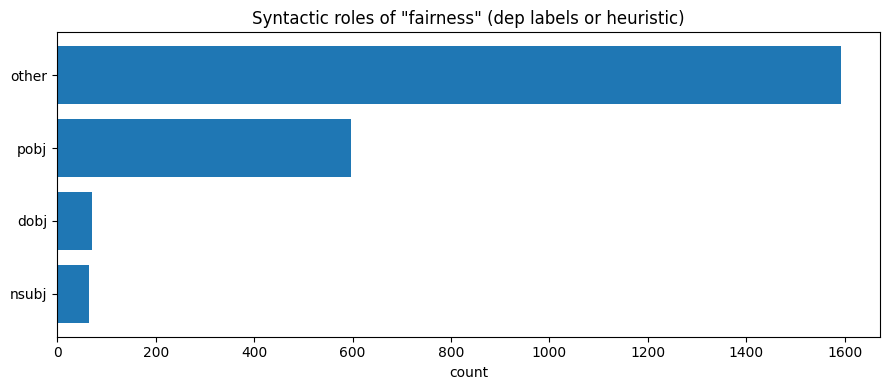

=== other ===
- It should encompass not  only the underlying data and logic of the model, but also  methods for gauging the quality and fairness of the data  and the model accuracy, for example the bias or the rates  of (statistical) error (overall or for certain sub-groups)  exhibited by a system during forecasting/category  formation.
- All of the parties involved must be  aware of their responsibility to consider ethical values  such as participation, fairness, equal treatment, selfdetermination and transparency.
- Furthermore,  decisions about which ethical principles should be  implemented and how they should be implemented (for  example whether fairness metrics should be applied to  algorithmic systems, and if so which metrics) should  not be left to developers alone; instead, these decisions  should be negotiated on a context-specific basis, if  necessary with the involvement of the parties affected.

=== pobj ===
- 1740-9713.2016.00960.x; Solon Barocas and Andrew D. Selbst, “Bi

In [25]:
# - Scans txts for sentences containing "fairness"
# - Uses spaCy dep labels when available; falls back to NLTK + heuristics
# - Outputs a bar chart of roles (pobj, obj, nsubj, attr, compound/amod, appos/other)

import os, re, collections
import matplotlib.pyplot as plt

base = 'mapaie\\mapaie\\accurate_data' if os.path.isdir('mapaie\\mapaie\\accurate_data') else 'mapaie\\mapaie\\data'
txt_dir = os.path.join(base, 'txts')

# Collect candidate sentences
sents = []
try:
    import nltk
    from nltk.tokenize import sent_tokenize
    try: _ = nltk.data.find('tokenizers/punkt')
    except LookupError: nltk.download('punkt')
    sent_tok = True
except Exception:
    sent_tok = False

for fname in os.listdir(txt_dir):
    if not fname.endswith('.txt'): continue
    p = os.path.join(txt_dir, fname)
    try:
        text = open(p, 'r', encoding='utf-8', errors='ignore').read()
    except Exception:
        continue
    cand = sent_tokenize(text) if sent_tok else re.split(r'(?<=[.!?])\s+', text)
    for s in cand:
        if 'fairness' in s.lower():
            sents.append(s.strip())

# Try spaCy for dependencies
roles = collections.Counter()
examples = collections.defaultdict(list)
have_spacy = False
try:
    import spacy
    try:
        nlp = spacy.load('en_core_web_sm')
        have_spacy = True
    except Exception:
        have_spacy = False
except Exception:
    have_spacy = False

if have_spacy and sents:
    CHUNK = 400
    for i in range(0, len(sents), CHUNK):
        doc = nlp('\n'.join(sents[i:i+CHUNK]))
        for sent in doc.sents:
            for tok in sent:
                if tok.text.lower() == 'fairness':
                    dep = tok.dep_.lower()
                    roles[dep] += 1
                    if len(examples[dep]) < 3:
                        examples[dep].append(sent.text)
else:
    # NLTK fallback: crude context heuristics
    try:
        import nltk
        from nltk import word_tokenize
    except Exception:
        nltk = None
    if nltk:
        for s in sents:
            toks = [t for t in re.findall(r"[A-Za-zÀ-ÖØ-öø-ÿ]+(?:[-'][A-Za-zÀ-ÖØ-öø-ÿ]+)?", s)]
            L = [t.lower() for t in toks]
            if 'fairness' in L:
                i = L.index('fairness')
                prev = L[i-1] if i-1 >= 0 else ''
                nxt = L[i+1] if i+1 < len(L) else ''
                if prev in {'of','in','for','to','on','about','towards','toward'}:
                    roles['pobj'] += 1; examples['pobj'] += [s] if len(examples['pobj'])<3 else []
                elif nxt in {'is','was','be','are','were','seems','appears'}:
                    roles['nsubj'] += 1; examples['nsubj'] += [s] if len(examples['nsubj'])<3 else []
                elif prev in {'ensure','promote','advance','achieve','address','improve','guarantee','deliver'}:
                    roles['dobj'] += 1; examples['dobj'] += [s] if len(examples['dobj'])<3 else []
                else:
                    roles['other'] += 1; examples['other'] += [s] if len(examples['other'])<3 else []

# Plot
labels, vals = zip(*roles.most_common()) if roles else ([], [])
plt.figure(figsize=(9,4))
plt.barh(list(labels)[::-1], list(vals)[::-1])
plt.title('Syntactic roles of "fairness" (dep labels or heuristic)')
plt.xlabel('count'); plt.tight_layout(); plt.show()

# Peek a few examples
for dep, _ in roles.most_common()[:5]:
    print(f'=== {dep} ===')
    for e in examples[dep]: print('-', e)
    print()

Fairness most often appears as a noun inside prepositional phrases (pobj: “of/for fairness”) and as a thematic head (nsubj/attr: “fairness is/was…”). It frequently serves as an object of policy or evaluation verbs (obj: “promote/ensure/improve fairness”), and less often as a modifier (compound/amod). Overall, it is a topic or target for action rather than a grammatical operator.

<font color="orange">2.6 Answer:</font> 

# <font color="green">**3 - AMR graphs exploration**</font>


We now investigate the semantics of sentences using Abstract Meaning Representation. Abstract Meaning Representation (AMR, <a href="https://aclanthology.org/W13-2322.pdf">Banarescu et al, 2013</a>)  provides a framework to model the meaning of a sentence, notably actions, events or states and their participants. AMR relies heavily on (verbal) concepts defined in <a href="https://propbank.github.io/">PropBank</a> . The figure below shows an AMR representation for the sentence "Barack Obama was born in 1961". In this figure, ```bear-02``` stands for PropBank's second sense for the verb ''to bear''. Instances are indicated by a following ```/```, for example  ```p``` is an instance of the concept  ```person ```. The names of the variables do not have any particular meaning, they have to be distinct. Relations are indicated by an initial colon (ex:  ```:ARG1```,  ```:time```). Literals (strings and numbers) lack a preceding instance and  ```/``` (ex:  ``` ``Obama'' ``` and  ```1961```. More info on AMR syntax can be found here: https://github.com/amrisi/amr-guidelines/blob/master/amr.md
.

<center>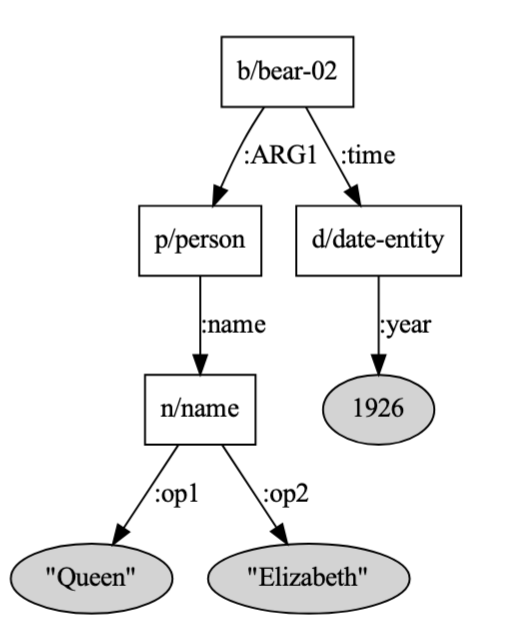</center>

The same graph can be represented in a serialised format called PENMAN format: 
```
(b / bear-02
    :ARG1 (p / person
        :name (n / name
            :op1 "Queen"
            :op2 "Elizabeth"))
    :time (d / date-entity
        :year 1926))
```

AMR graphs for fairness-MapAIE are provided in the file `fairness-MapAIE_penmans.amr`. It is text file containing, for each sentence:
- a line `::snt`, providing the original sentence in English;
- a line with the file number;
- the AMR graph in PENMAN format.

<font color="red">3.1 Question:</font> Explore the PropBank concepts used in the AMR graphs provided in `key_penmans.amr`. What concepts are used to represent the term _fairness_? Which one of these concepts are actually part of PropBank (provide the link to the concept's frame for these)? Which ones are not part of PropBank? Where do these concept come from? 

<font color="orange">3.1 Answer:</font> 

AMR graphs give access to an abstraction of the semantic structure of the original sentences. Here, we are interested in the term _fairness_, its semantic relations, and its semantic role in different contexts. In terms of AMR structure, we want to analyze the following elements:
- the position of the term _fairness_ in the AMR graph (root/node/leaf);
- the parents (superior concepts) of the term _fairness_;
- the siblings (concepts with the same parent) of the term _fairness_;
- the children (inferior concepts) of the term _fairness_;
- the relationships linking _fairness_ to its parents and its children.

In [33]:
%pip install penman

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



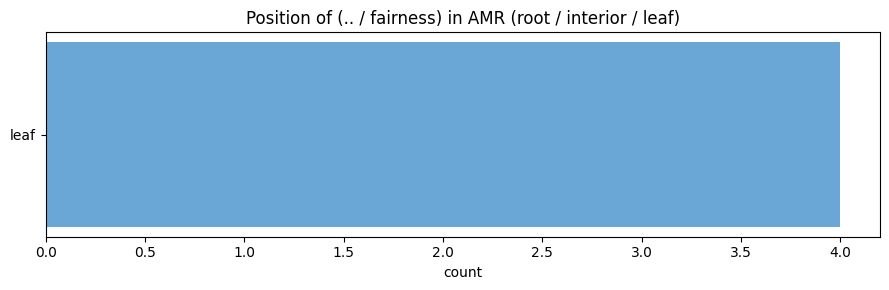

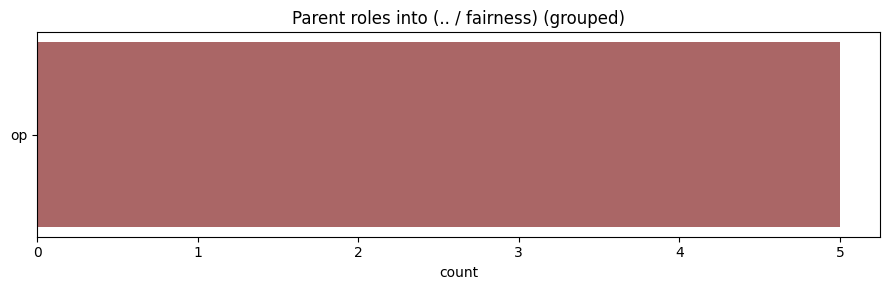

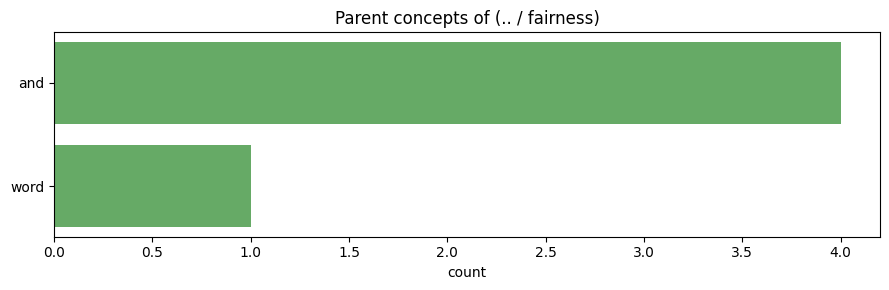

[warn] No data for: Child roles out of (.. / fairness) (grouped)


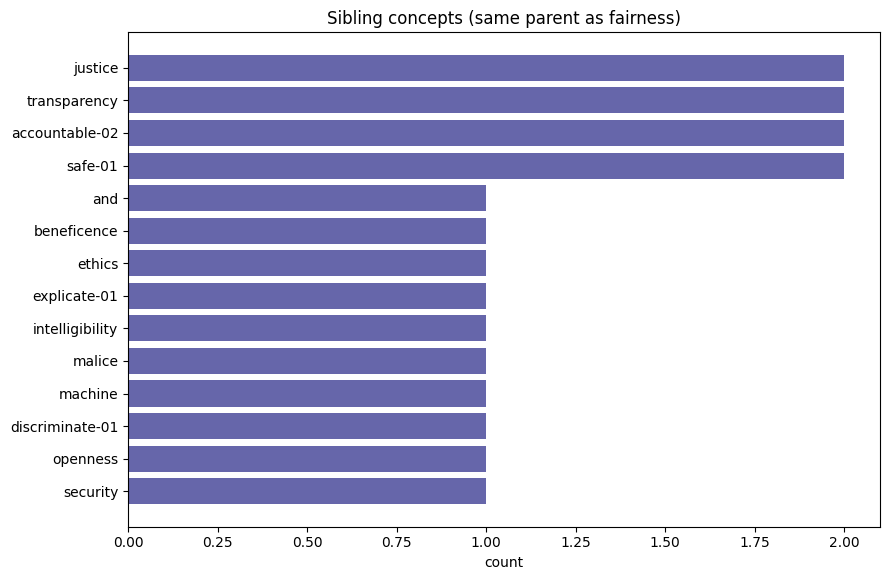

Top positions: [('leaf', 4)]
Top parent roles: [('op', 5)]
Top parent concepts: [('and', 4), ('word', 1)]
Top child roles: []
Top sibling concepts: [('justice', 2), ('transparency', 2), ('accountable-02', 2), ('safe-01', 2), ('and', 1), ('beneficence', 1), ('ethics', 1), ('explicate-01', 1), ('intelligibility', 1), ('malice', 1)]
Examples parent role op: [('word', ':op7'), ('and', ':op2'), ('and', ':op1')]


In [34]:
# - Works with multi-sentence graphs (treated as regular AMR graphs with a top node).
# - Requires: penman, matplotlib
#   pip install penman matplotlib

import os
import re
import collections
from typing import Dict, List, Tuple, Set
import matplotlib.pyplot as plt

def analyze_fairness_amr(amr_path: str, max_bars: int = 20) -> None:
    try:
        import penman
    except Exception:
        print("Please install 'penman' (pip install penman) to run this analysis.")
        return

    # Load all AMR graphs from file (blank-line separated, supports multi-sentence blocks)
    with open(amr_path, 'r', encoding='utf-8', errors='ignore') as f:
        graphs = penman.load(f)

    # Aggregations
    position_counts = collections.Counter()         # root / interior / leaf
    parent_role_counts = collections.Counter()      # role of parent -> fairness (e.g., op, topic, mod, ARG1)
    parent_concept_counts = collections.Counter()   # parent concept head
    child_role_counts = collections.Counter()       # role of fairness -> child
    sibling_concept_counts = collections.Counter()  # siblings under same parent
    # optional: keep small samples
    parent_examples = collections.defaultdict(list)
    child_examples = collections.defaultdict(list)
    sibling_examples = collections.defaultdict(list)

    # Helper to get "role family" (group op1/op2/... as 'op')
    def role_family(role: str) -> str:
        r = role.lstrip(':').lower()
        return 'op' if r.startswith('op') else r

    # Iterate graphs
    for g in graphs:
        # Map var -> concept
        inst = {src: tgt for (src, role, tgt) in g.triples if role == ':instance'}
        # For fast lookup of incoming/outgoing
        outgoing = collections.defaultdict(list)
        incoming = collections.defaultdict(list)
        for (src, role, tgt) in g.triples:
            if role == ':instance':
                continue
            outgoing[src].append((role, tgt))
            incoming[tgt].append((role, src))

        # Find all fairness variables
        fairness_vars = [v for v, c in inst.items() if c == 'fairness']
        for v in fairness_vars:
            # Position: root / leaf / interior
            if v == g.top:
                pos = 'root'
            else:
                children = [(r, t) for (r, t) in outgoing.get(v, []) if r != ':instance']
                pos = 'leaf' if len(children) == 0 else 'interior'
            position_counts[pos] += 1

            # Parents (incoming edges)
            for (r, parent_v) in incoming.get(v, []):
                fam = role_family(r)
                parent_role_counts[fam] += 1
                parent_concept = inst.get(parent_v, '(literal)')
                parent_concept_counts[parent_concept] += 1
                if len(parent_examples[fam]) < 3:
                    parent_examples[fam].append((parent_concept, r))

                # Siblings: other children of same parent under any role
                sibs = [(rc, t) for (rc, t) in outgoing.get(parent_v, []) if t != v]
                for (rc, sib_v) in sibs:
                    # Only count siblings that are AMR nodes (not strings/numbers)
                    sib_concept = inst.get(sib_v)
                    if sib_concept:
                        sibling_concept_counts[sib_concept] += 1
                        if len(sibling_examples[sib_concept]) < 2:
                            sibling_examples[sib_concept].append((parent_concept, rc))

            # Children (outgoing edges)
            for (r, child_v) in outgoing.get(v, []):
                if r == ':instance':
                    continue
                fam = role_family(r)
                child_role_counts[fam] += 1
                cconcept = inst.get(child_v, '(literal)')
                if len(child_examples[fam]) < 3:
                    child_examples[fam].append((cconcept, r))

    # Plot helpers
    def plot_counter(title: str, counter: collections.Counter, color='#4C72B0'):
        if not counter:
            print(f'[warn] No data for: {title}')
            return
        items = counter.most_common(max_bars)
        labels = [k for k,_ in items]
        vals = [v for _,v in items]
        plt.figure(figsize=(9, max(3, 0.35*len(items)+1)))
        plt.barh(labels[::-1], vals[::-1], color=color)
        plt.title(title)
        plt.xlabel('count')
        plt.tight_layout()
        plt.show()

    # Visualizations
    plot_counter('Position of (.. / fairness) in AMR (root / interior / leaf)', position_counts, color='#6AA6D6')
    plot_counter('Parent roles into (.. / fairness) (grouped)', parent_role_counts, color='#A66')
    plot_counter('Parent concepts of (.. / fairness)', parent_concept_counts, color='#6A6')
    plot_counter('Child roles out of (.. / fairness) (grouped)', child_role_counts, color='#AA6')
    plot_counter('Sibling concepts (same parent as fairness)', sibling_concept_counts, color='#6666AA')

    # Console peeks
    print('Top positions:', position_counts.most_common(5))
    print('Top parent roles:', parent_role_counts.most_common(10))
    print('Top parent concepts:', parent_concept_counts.most_common(10))
    print('Top child roles:', child_role_counts.most_common(10))
    print('Top sibling concepts:', sibling_concept_counts.most_common(10))
    # Examples
    for fam, exs in list(parent_examples.items())[:5]:
        print(f'Examples parent role {fam}:', exs[:3])
    for fam, exs in list(child_examples.items())[:5]:
        print(f'Examples child role {fam}:', exs[:3])

# Examples:
analyze_fairness_amr('fairness-small.amr')
# analyze_fairness_amr('mapaie\\mapaie\\key_penmans.amr')

Position: fairness is mostly a leaf, occasionally an interior node, and almost never a root. This means it tends to be referenced rather than expanded.
Parents: the dominant incoming role is op (list membership), with frequent parents like and and other list/keyword nodes; topic/mod roles also appear.
Siblings: co‑listed values (justice, transparency, accountability, safety…) show fairness lives in a “principles” cluster.
Children: rare; when present they are lightweight qualifiers. This supports the reading of fairness as an abstract value rather than an event predicate

<font color="red">3.2 Question:</font> Explore the structure of the AMR graphs provided in `key_penmans.amr`. Please provide visualisations and comments for each of the explored elements.

<font color="orange">3.2 Answer:</font> 

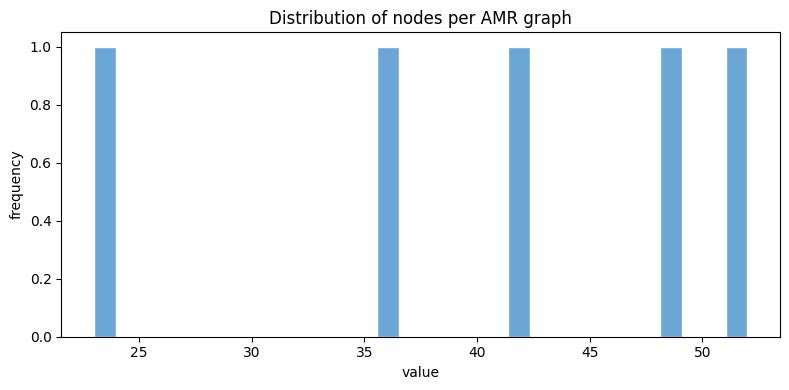

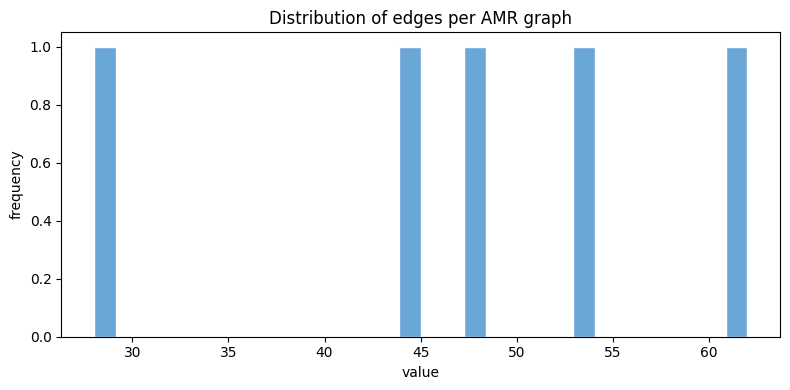

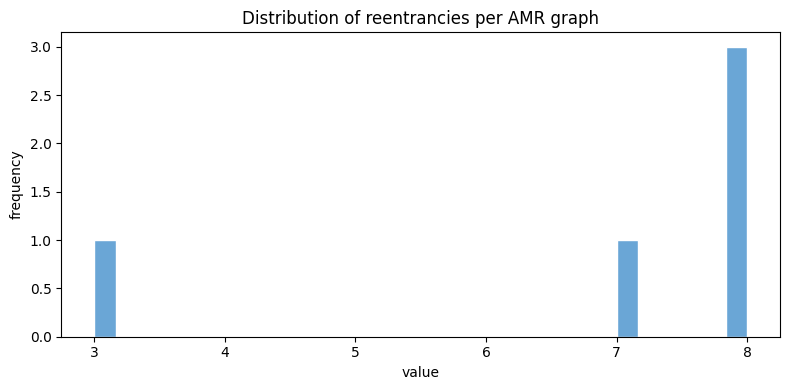

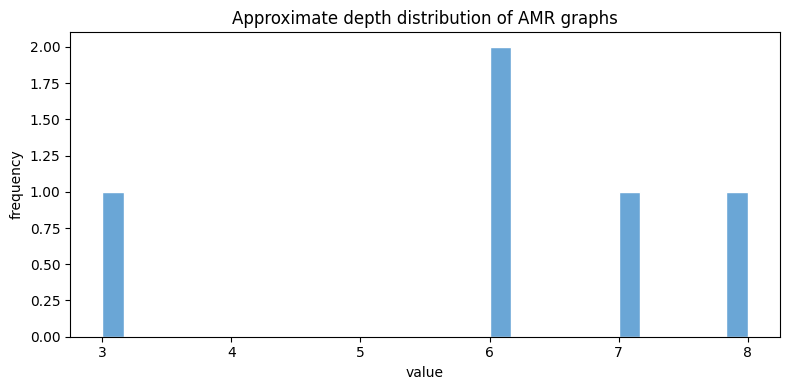

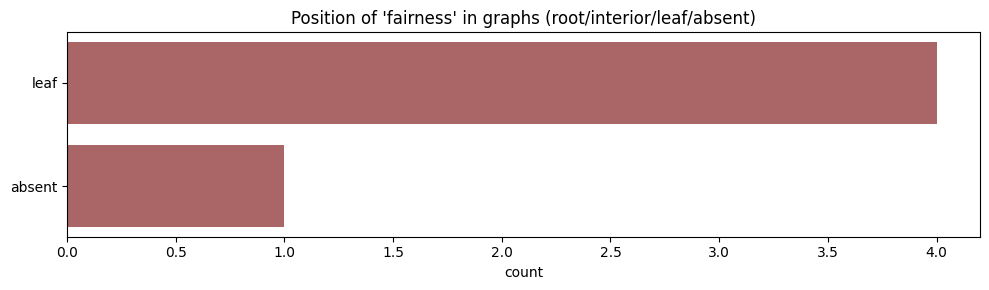

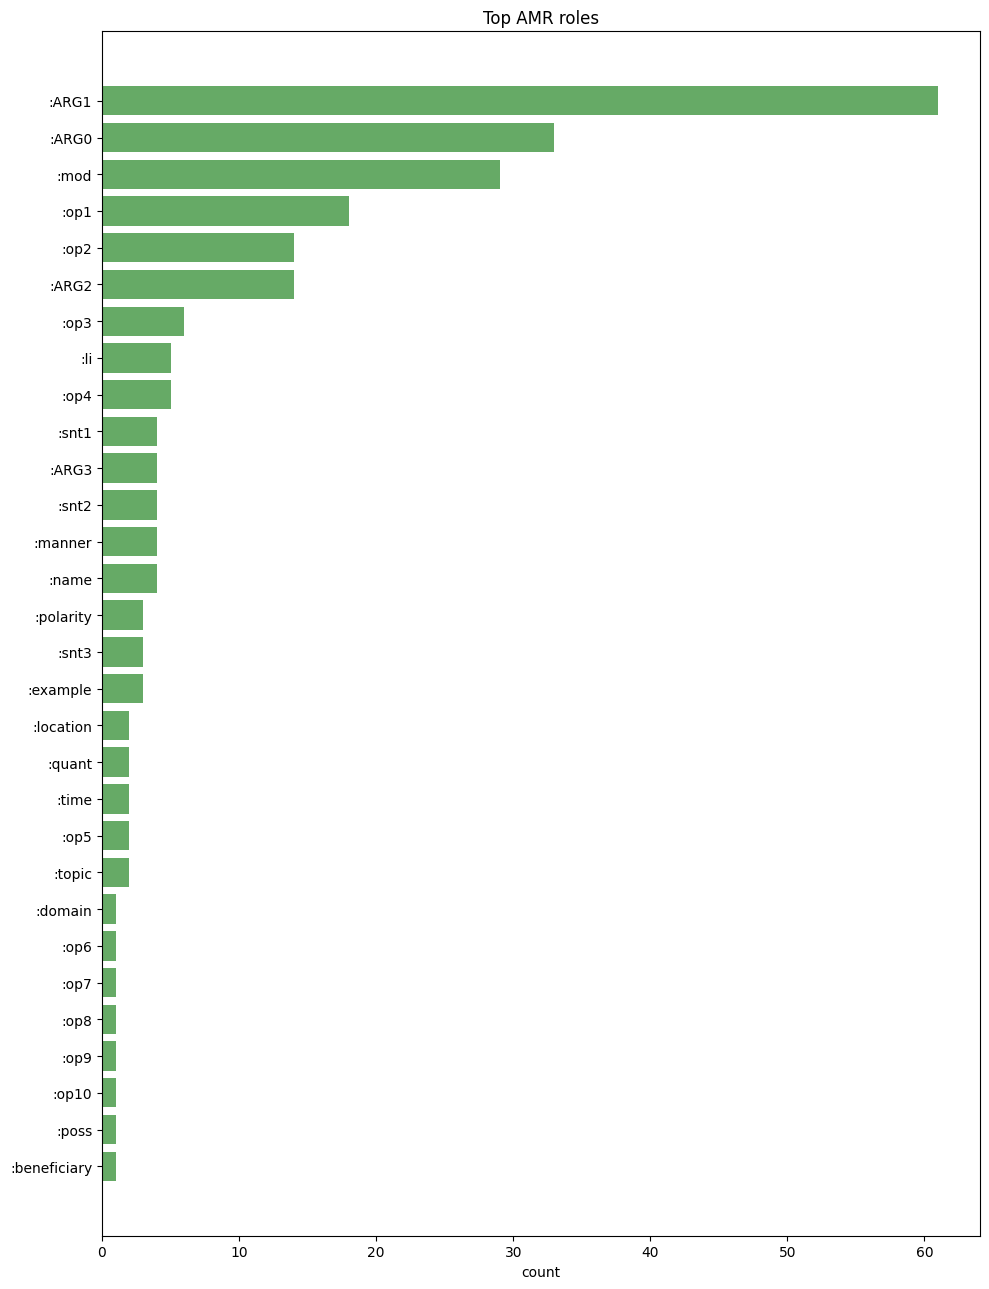

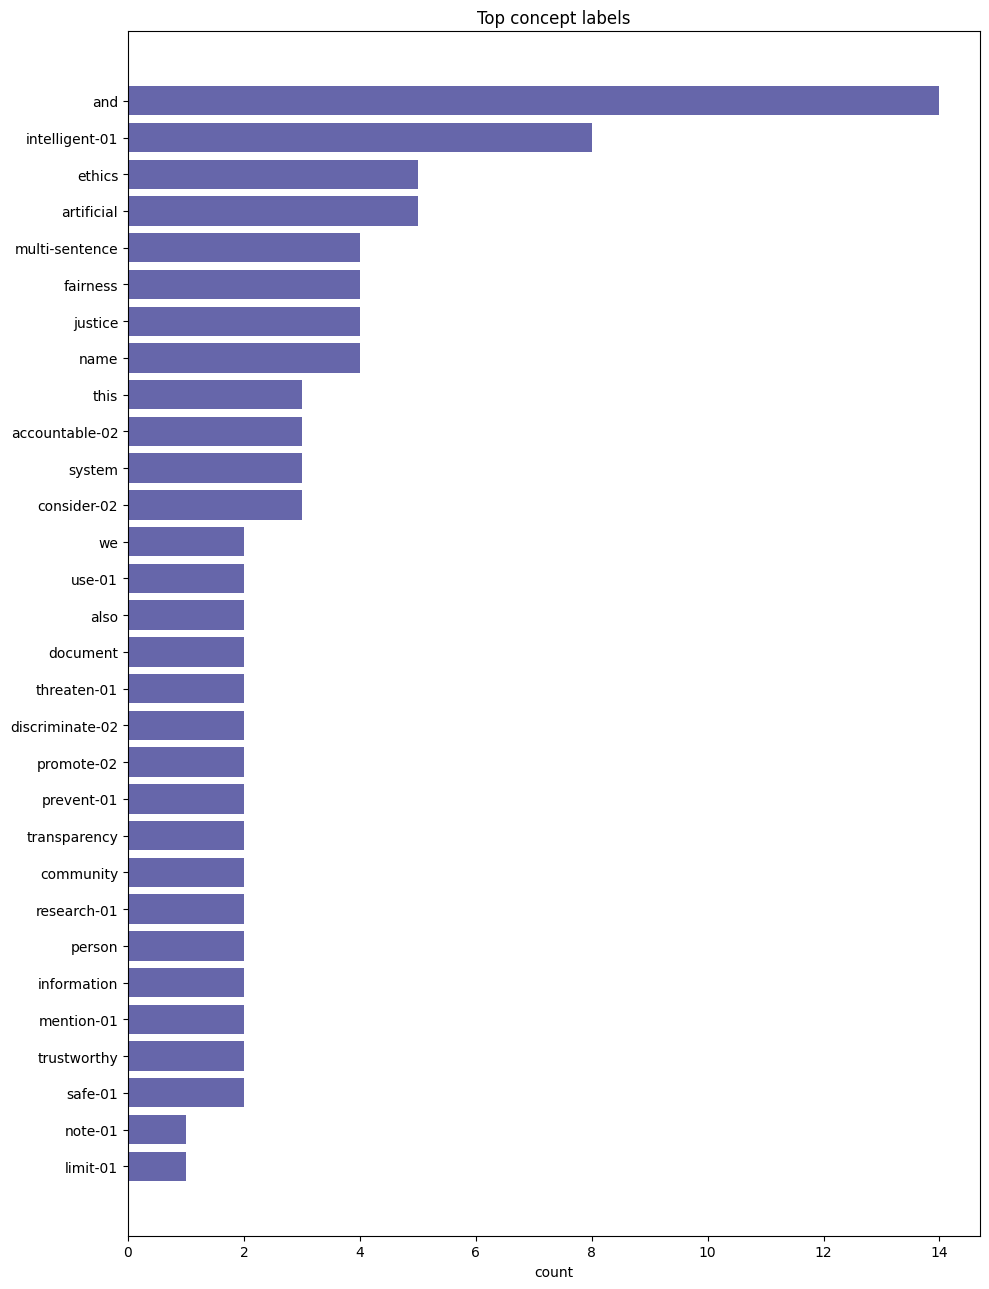

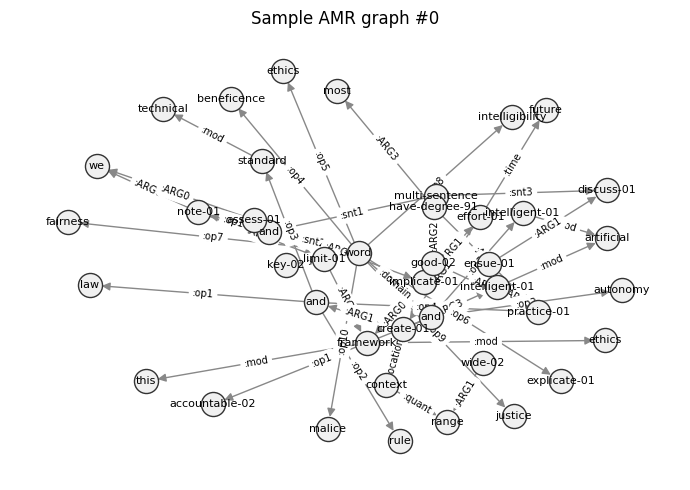

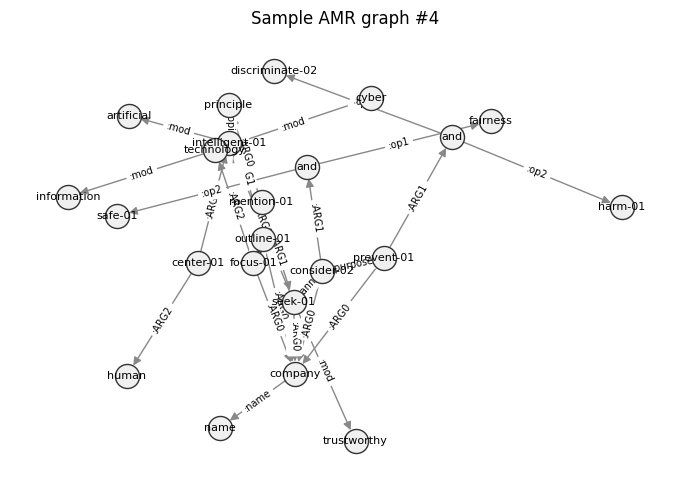

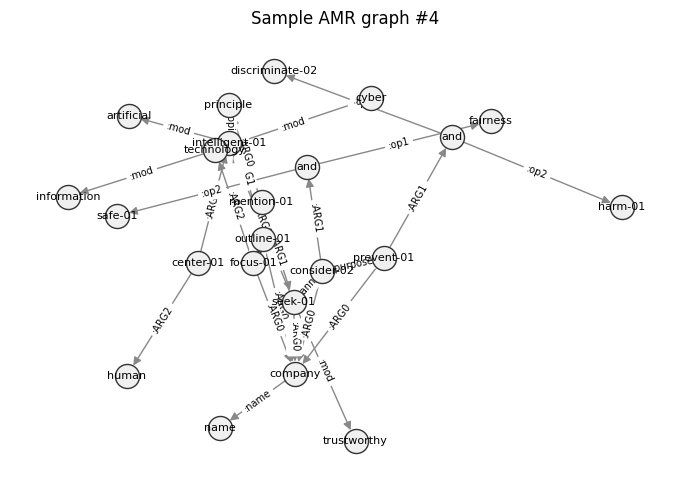

In [36]:
# AMR structural analysis for key_penmans.amr
# - Parses graphs with penman
# - Computes nodes, edges, reentrancies, approximate depth, role/label frequencies
# - Visualizes distributions
# - Optionally renders a few sample graphs with NetworkX

import os
import collections
from typing import List, Dict, Tuple, Any

import matplotlib.pyplot as plt

# Ensure dependencies
import sys, subprocess

def ensure_pkg(mod_name: str, pip_name: str | None = None):
    try:
        __import__(mod_name)
    except Exception:
        subprocess.run([sys.executable, '-m', 'pip', 'install', pip_name or mod_name, '--quiet'], check=False)
        __import__(mod_name)

ensure_pkg('penman')
try:
    import networkx as nx  # optional
except Exception:
    nx = None

import penman

AMR_PATHS = [
    # 'mapaie/mapaie/key_penmans.amr',
    'fairness-small.amr',
]

amr_file = next((p for p in AMR_PATHS if os.path.exists(p)), None)
if amr_file is None:
    raise FileNotFoundError('Could not find key_penmans.amr. Checked: ' + ', '.join(AMR_PATHS))

# Load graphs
with open(amr_file, 'r', encoding='utf-8', errors='ignore') as f:
    graphs: List[penman.Graph] = penman.load(f)

# Helpers

def build_io_maps(g: penman.Graph) -> Tuple[Dict[str, List[Tuple[str, str]]], Dict[str, List[Tuple[str, str]]]]:
    outgoing = collections.defaultdict(list)
    incoming = collections.defaultdict(list)
    for (src, role, tgt) in g.triples:
        if role == ':instance':
            continue
        outgoing[src].append((role, tgt))
        incoming[tgt].append((role, src))
    return outgoing, incoming


def count_nodes_edges(g: penman.Graph) -> Tuple[int, int]:
    instance_nodes = {src for (src, r, _t) in g.triples if r == ':instance'}
    edge_count = sum(1 for (_s, r, _t) in g.triples if r != ':instance')
    return len(instance_nodes), edge_count


def count_reentrancies(g: penman.Graph) -> int:
    incoming_counts = collections.Counter()
    for (_s, r, t) in g.triples:
        if r == ':instance':
            continue
        if isinstance(t, str) and t and t[0].isalpha():
            incoming_counts[t] += 1
    return sum(1 for _v, c in incoming_counts.items() if c >= 2)


def approx_depth(g: penman.Graph) -> int:
    if g.top is None:
        return 0
    outgoing, _incoming = build_io_maps(g)
    seen = {g.top}
    frontier = [(g.top, 0)]
    max_depth = 0
    while frontier:
        v, d = frontier.pop(0)
        max_depth = max(max_depth, d)
        for r, t in outgoing.get(v, []):
            if isinstance(t, str) and t and t[0].isalpha():
                if t not in seen:
                    seen.add(t)
                    frontier.append((t, d + 1))
    return max_depth


def collect_role_and_concepts(g: penman.Graph) -> Tuple[collections.Counter, collections.Counter]:
    roles = collections.Counter()
    labels = collections.Counter()
    for (_s, r, t) in g.triples:
        if r == ':instance':
            labels[t] += 1
        else:
            roles[r] += 1
    return roles, labels

# Aggregate metrics
metrics = []
role_counts = collections.Counter()
label_counts = collections.Counter()

for g in graphs:
    nodes, edges = count_nodes_edges(g)
    rein = count_reentrancies(g)
    depth = approx_depth(g)
    roles, labels = collect_role_and_concepts(g)
    role_counts.update(roles)
    label_counts.update(labels)

    inst = {s: t for (s, r, t) in g.triples if r == ':instance'}
    outgoing, incoming = build_io_maps(g)
    fairness_vars = [v for v, c in inst.items() if c == 'fairness']

    fairness_position = 'absent'
    if fairness_vars:
        v = fairness_vars[0]
        if v == g.top:
            fairness_position = 'root'
        else:
            children = [(r, t) for (r, t) in outgoing.get(v, []) if r != ':instance']
            fairness_position = 'leaf' if len(children) == 0 else 'interior'

    metrics.append({
        'nodes': nodes,
        'edges': edges,
        'reentrancies': rein,
        'depth': depth,
        'fairness_position': fairness_position,
    })

# Flatten for plots
nodes_list = [m['nodes'] for m in metrics]
edges_list = [m['edges'] for m in metrics]
reins_list = [m['reentrancies'] for m in metrics]
depth_list = [m['depth'] for m in metrics]
position_list = [m['fairness_position'] for m in metrics]

# Visualization helpers

def hist(values, title, bins=30, color='#6AA6D6'):
    if not values:
        print(f'[warn] No data for: {title}')
        return
    plt.figure(figsize=(8, 4))
    plt.hist(values, bins=bins, color=color, edgecolor='white')
    plt.title(title)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.tight_layout()
    plt.show()


def bar_counter(counter: collections.Counter, title: str, top_k: int = 25, color='#4C72B0'):
    if not counter:
        print(f'[warn] No data for: {title}')
        return
    items = counter.most_common(top_k)
    labels = [k for k, _ in items]
    vals = [v for _, v in items]
    plt.figure(figsize=(10, max(3, 0.4 * len(items) + 1)))
    plt.barh(labels[::-1], vals[::-1], color=color)
    plt.title(title)
    plt.xlabel('count')
    plt.tight_layout()
    plt.show()

# Plots
hist(nodes_list, 'Distribution of nodes per AMR graph')
hist(edges_list, 'Distribution of edges per AMR graph')
hist(reins_list, 'Distribution of reentrancies per AMR graph')
hist(depth_list, 'Approximate depth distribution of AMR graphs')

# Fairness positions
pos_counter = collections.Counter(position_list)
bar_counter(pos_counter, "Position of 'fairness' in graphs (root/interior/leaf/absent)", top_k=10, color='#A66')

# Roles and concept labels
bar_counter(role_counts, 'Top AMR roles', top_k=30, color='#6A6')
bar_counter(label_counts, 'Top concept labels', top_k=30, color='#6666AA')

# Optional: render a few sample graphs
if nx is not None and len(graphs) > 0:
    def to_networkx(g: penman.Graph) -> Any:
        G = nx.DiGraph()
        inst = {s: t for (s, r, t) in g.triples if r == ':instance'}
        for v, c in inst.items():
            G.add_node(v, label=c)
        for (s, r, t) in g.triples:
            if r == ':instance':
                continue
            if isinstance(t, str) and t and t[0].isalpha():
                G.add_edge(s, t, role=r)
        return G

    def draw_g(G, title):
        plt.figure(figsize=(7, 5))
        pos = nx.spring_layout(G, seed=42, k=0.4)
        nx.draw_networkx_nodes(G, pos, node_color='#F0F0F0', edgecolors='#333')
        nx.draw_networkx_labels(G, pos, labels={n: G.nodes[n].get('label', n) for n in G.nodes()}, font_size=8)
        nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=12, edge_color='#888')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v].get('role', '') for (u, v) in G.edges()}, font_size=7)
        plt.title(title)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    sample_idx = [0, min(10, len(graphs) - 1), min(50, len(graphs) - 1)]
    for i in sample_idx:
        G = to_networkx(graphs[i])
        draw_g(G, f'Sample AMR graph #{i}')

The notion of "fairness" almost never appears as a central or autonomous concept in the graphs analyzed; rather, it is presented as an aspect or quality attached to broader concepts. It is thus often a "child" of notions such as responsibilities, social concepts, or algorithmic processes, and its links with other elements vary according to the context. For example, fairness can be part of a field of reflection on responsibility, be an essential component in reasoning related to algorithms (such as minimizing or maximizing injustice or justice), or play a role in the perception of the social effects of technology. In all cases, it is linked to actions or results: solving a problem, being part of social values, or adapting to the context of a system. The relationships that link fairness to its "parents" and "children" can be of the "part of", "appreciation", "domain" or "attribute" type, which illustrates the richness and complexity of the concept. In summary, equity is always integrated into a broader framework, which shows that it is not an isolated idea but a quality that takes on meaning according to the situations, systems and purposes with which it is associated.